In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
hc_faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
hc_eyes = cv2.CascadeClassifier('haarcascade_eye.xml')

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# A function to detect faces
def detect_faces(cascade, test_image):
    image_copy = test_image.copy()
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    rect = cascade.detectMultiScale(gray_image,1.3,5)
    for (x, y, w, h) in rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 1)
        
    return convertToRGB(image_copy)

# A function to detect faces and eyes
def detect_faces_eyes(cascade,eye_cascade,test_image):
    image_copy = test_image.copy()
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    rect = cascade.detectMultiScale(gray_image,1.3,5)
    for (x,y,w,h) in rect:
        image_copy = cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),1)
        roi_gray = gray_image[y:y+h, x:x+w]
        roi_color = image_copy[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
    return convertToRGB(image_copy)

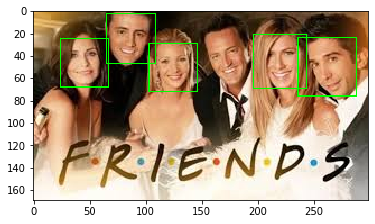

In [4]:
test_image = cv2.imread('friendsFaces.jpg')
image = detect_faces(hc_faces,test_image)
plt.imshow(image)

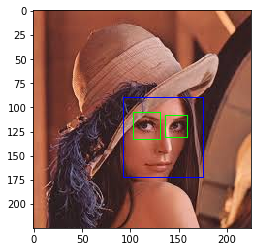

In [5]:
test_image = cv2.imread('test.jpg')
image = detect_faces_eyes(hc_faces,hc_eyes,test_image)
plt.imshow(image)